In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg
import seaborn as sns
from tqdm import tqdm
import plotly.express as px

## Condensed Data Preprocessing & Model Creation

In [2]:
df_companies = pd.read_csv('data/sp500_companies.csv')
df_index = pd.read_csv('data/sp500_index.csv')
df_index['Date'] = pd.to_datetime(df_index['Date'])
df_stocks = pd.read_csv('data/sp500_stocks.csv')

In [3]:
y = df_index['S&P500']
x = np.arange(len(y))
lc_model = KernelReg([y],[x],var_type='c', reg_type='lc',bw = [20])
y_pred = lc_model.fit(x)[0]

In [4]:
rmse = np.sqrt(np.mean((y-y_pred)**2))
mae= np.mean(np.abs(y-y_pred))
print('rmse:',round(rmse,5))
print('mae:', round(mae,5))

rmse: 76.61519
mae: 51.57929


## Problem 4: Model Bootstrapping and Evaluation

In [28]:
# Bootstrapping
n_boot = 2000
rmse_boot = np.zeros(n_boot)
mae_boot = np.zeros(n_boot)
n = len(y)
rng = np.random.default_rng(2)
for i in tqdm(range(n_boot)):
    sample = df_index.sample(n=n, replace=True, random_state=None)
    y_boot = sample['S&P500'].values
    x_boot = sample.index.values
    model_b = KernelReg([y_boot], [x_boot], var_type='c', reg_type='lc', bw=[20])
    yb_pred = model_b.fit(x)[0]
    rmse_boot[i] = np.sqrt(np.mean((y - yb_pred) ** 2))
    mae_boot[i] = np.mean(np.abs(y - yb_pred))

100%|██████████| 2000/2000 [11:25<00:00,  2.92it/s]


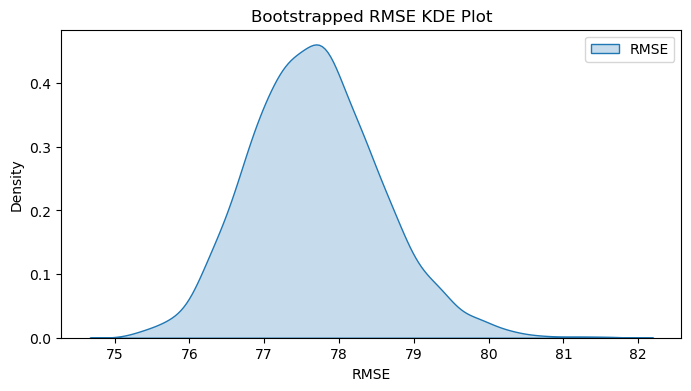

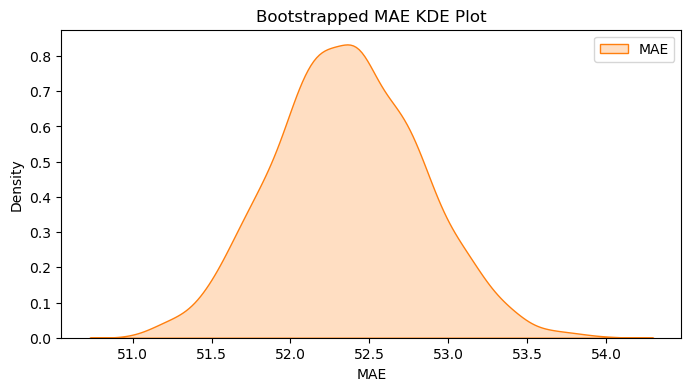

In [29]:
# KDE plot for RMSE
plt.figure(figsize=(8, 4))
sns.kdeplot(rmse_boot, label='RMSE', fill=True, color='tab:blue')
plt.xlabel('RMSE')
plt.ylabel('Density')
plt.title('Bootstrapped RMSE KDE Plot')
plt.legend()
plt.show()

# KDE plot for MAE
plt.figure(figsize=(8, 4))
sns.kdeplot(mae_boot, label='MAE', fill=True, color='tab:orange')
plt.xlabel('MAE')
plt.ylabel('Density')
plt.title('Bootstrapped MAE KDE Plot')
plt.legend()
plt.show()

In [ ]:
import plotly.figure_factory as ff

In [31]:
rmse_kde = ff.create_distplot(hist_data=[rmse_boot], group_labels=["RMSE"], bin_size=0.1)
rmse_kde.show()

In [32]:
mse_kde = ff.create_distplot(hist_data=[mae_boot], group_labels=["MAE"], bin_size=0.1)
mse_kde.show()